In [133]:
# import lib
import numpy      as np
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from   plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# data set 
import sklearn.datasets as datasets

init_notebook_mode(connected=True); np.random.seed(6789); tf.set_random_seed(67890); plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (30.0, 10.0)

In [221]:
# create functions and start session
try: 
    if sess._closed: sess = tf.InteractiveSession()
except:
    sess = tf.InteractiveSession()
def np_pca_svd(X):
    U,s,VT = np.linalg.svd(X,full_matrices=True)
    S      = np.diag(s)
    return U,S,VT.T
    
def tf_pca_svd(X,mmax=1.5,mmin=0.5): 
    s,U,V  = tf.linalg.svd(X,full_matrices=True)
    S      = tf.diag(s)
    s      = s.eval()
    ScaledS= (mmax-mmin)*((s-s.min())/(s.max()-s.min())) + mmin
    return U.eval(),S,V.eval(),ScaledS

def normalize_sign(A,B):
    """
    utility function for resolving the sign ambiguity in SVD
    http://stats.stackexchange.com/q/34396/115202
    """
    signs = np.sign(A) * np.sign(B)
    return A, B * signs    

def plot_data_with_pca(data,vector,value,cenx=0,ceny=0,width=0.05,title=None,save_fig=False,show_fig=True,close=True):
    plt.scatter(data[:,0],data[:,1],c=label,cmap='YlOrBr')
    ax1 = plt.arrow(cenx,ceny,*vector[:,0]*value[0],width=width,length_includes_head=False,color='Red' ,capstyle='projecting',label='PC 1')
    ax2 = plt.arrow(cenx,ceny,*vector[:,1]*value[1],width=width,length_includes_head=False,color='Blue',capstyle='projecting',label='PC 2')
    if title: plt.title(title,fontsize=20)
    plt.legend([ax1,ax2],['pc 1','pc 2']); plt.tight_layout()
    if save_fig: plt.savefig('figure/'+str(title)+'.png')
    if show_fig: plt.show()
    if close   : plt.close('all')
    
def normalize_with_range(data,mmax=1.,mmin=0.0):
    norm_data = (mmax-mmin) * ((data - data.min(0,keepdims=True))/ (data.max(0,keepdims=True)-data.min(0,keepdims=True))) + mmin
    return norm_data

number_of_data = 4000
skew_matrix    = np.array([[2,0.2],[1.1,0]])

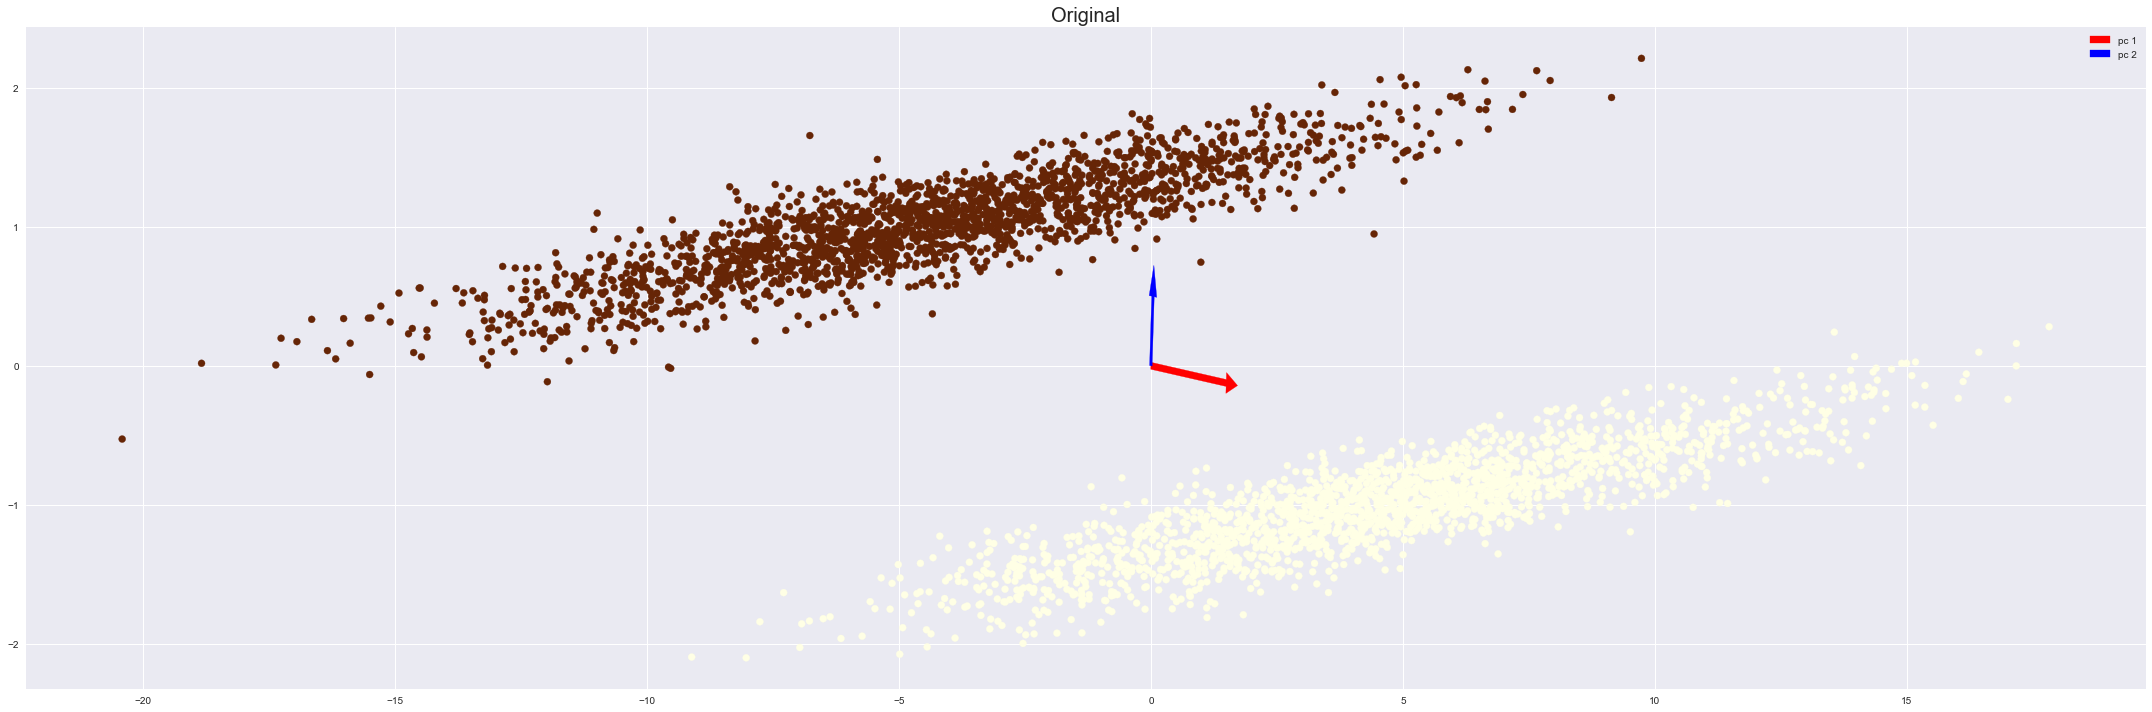

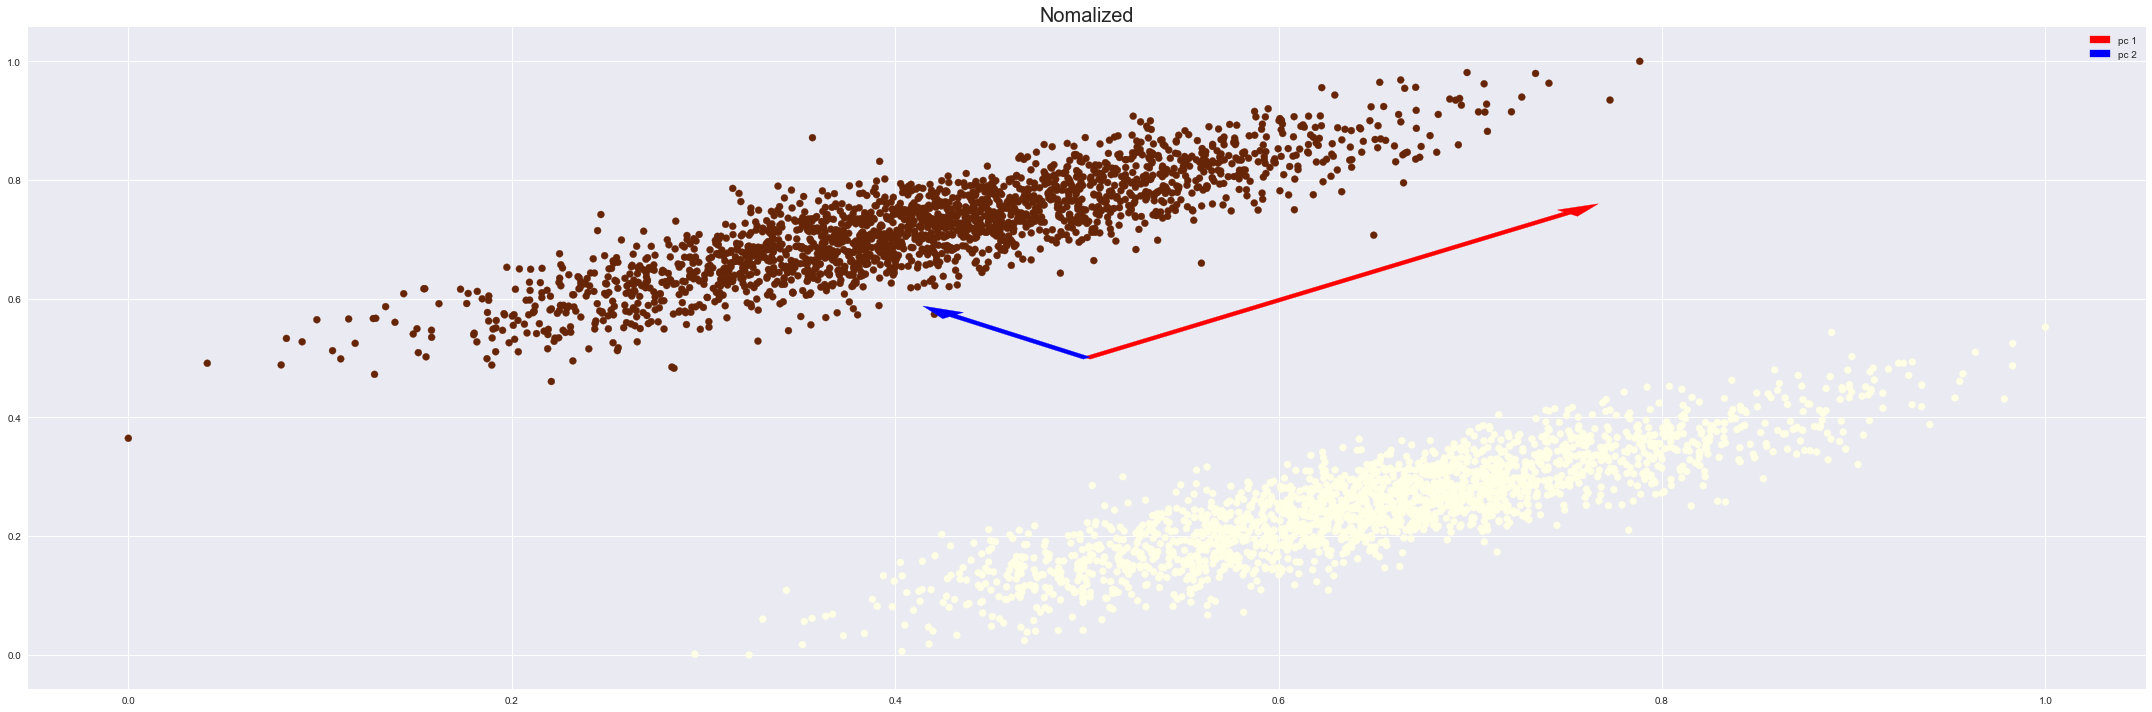

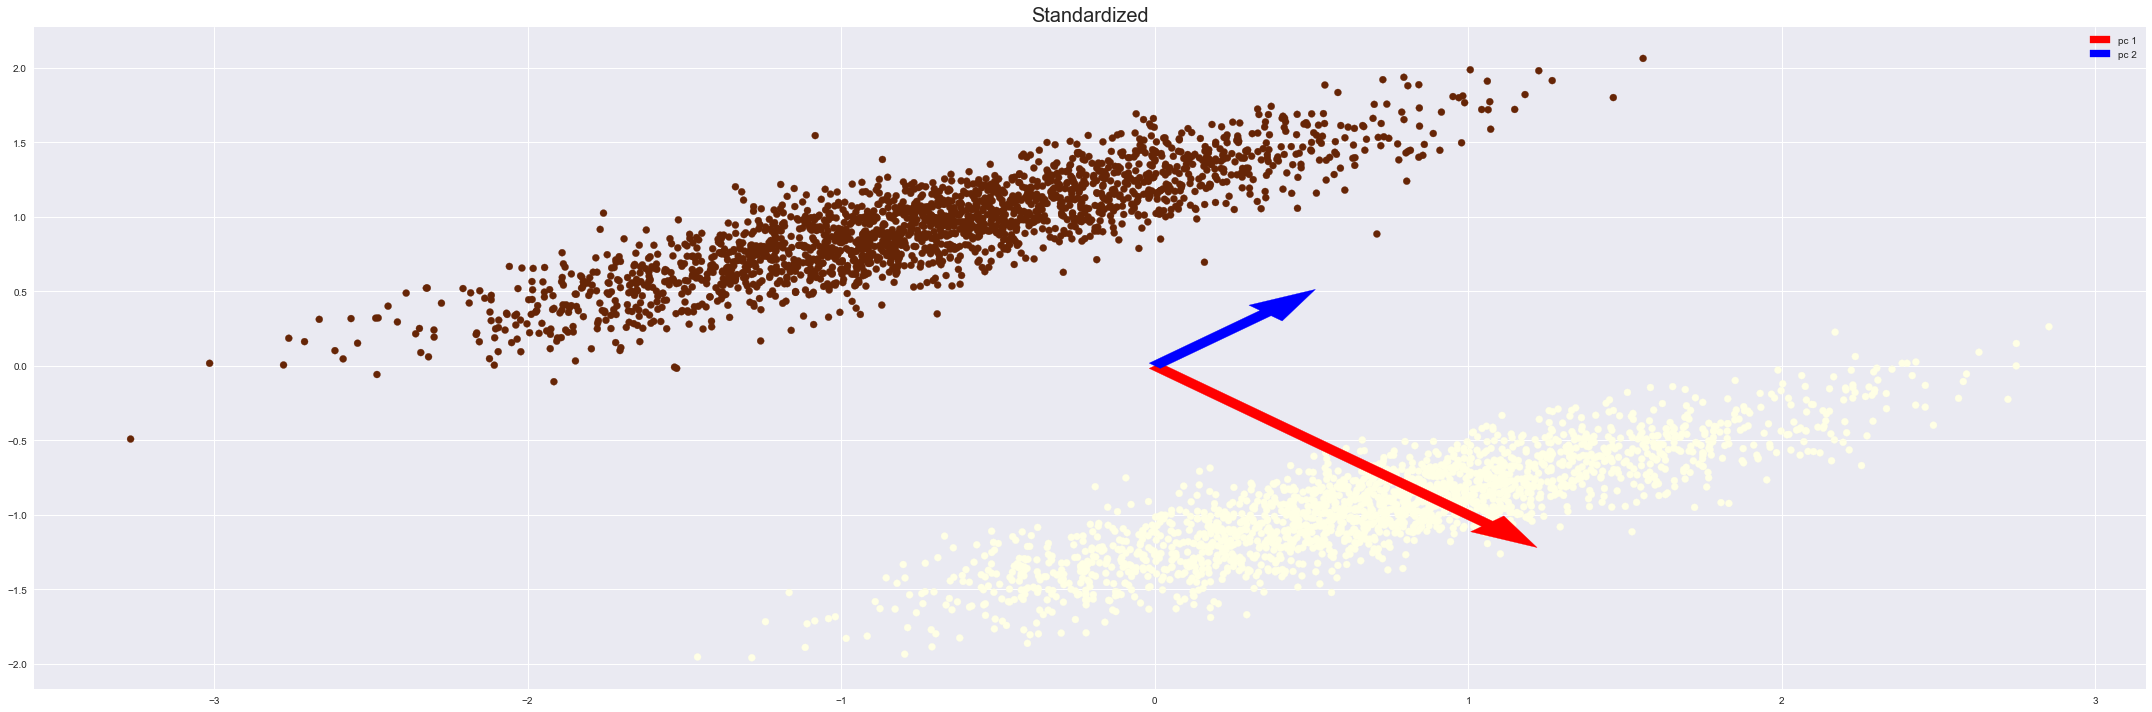

In [218]:
# create some simple dataset blobs and skew it (center it as well)
data,label = datasets.make_blobs(n_samples=number_of_data,centers=2,random_state=23,cluster_std =1.9,center_box =(-20,20))
data       = data @ skew_matrix
data       = data - data.mean(0,keepdims=True)

# 1. preprocess the data
normalized_data = (data-data.min(0,keepdims=True)) /(data.max(0,keepdims=True)-data.min(0,keepdims=True))
stadnardiz_data = (data-data.mean(0,keepdims=True))/ data.std(0,keepdims=True)

# 2. get the pc for each
og_U,og_S,og_V,og_ss = tf_pca_svd(data)
no_U,no_S,no_V,no_ss = tf_pca_svd(normalized_data,mmax=0.35,mmin=0.1)
st_U,st_S,st_V,st_ss = tf_pca_svd(stadnardiz_data)

plot_data_with_pca(data,og_V,og_ss,title='Original')
plot_data_with_pca(normalized_data,no_V,no_ss,cenx=0.5,ceny=0.5,width=0.005,title='Nomalized')
plot_data_with_pca(stadnardiz_data,st_V,st_ss,title='Standardized')

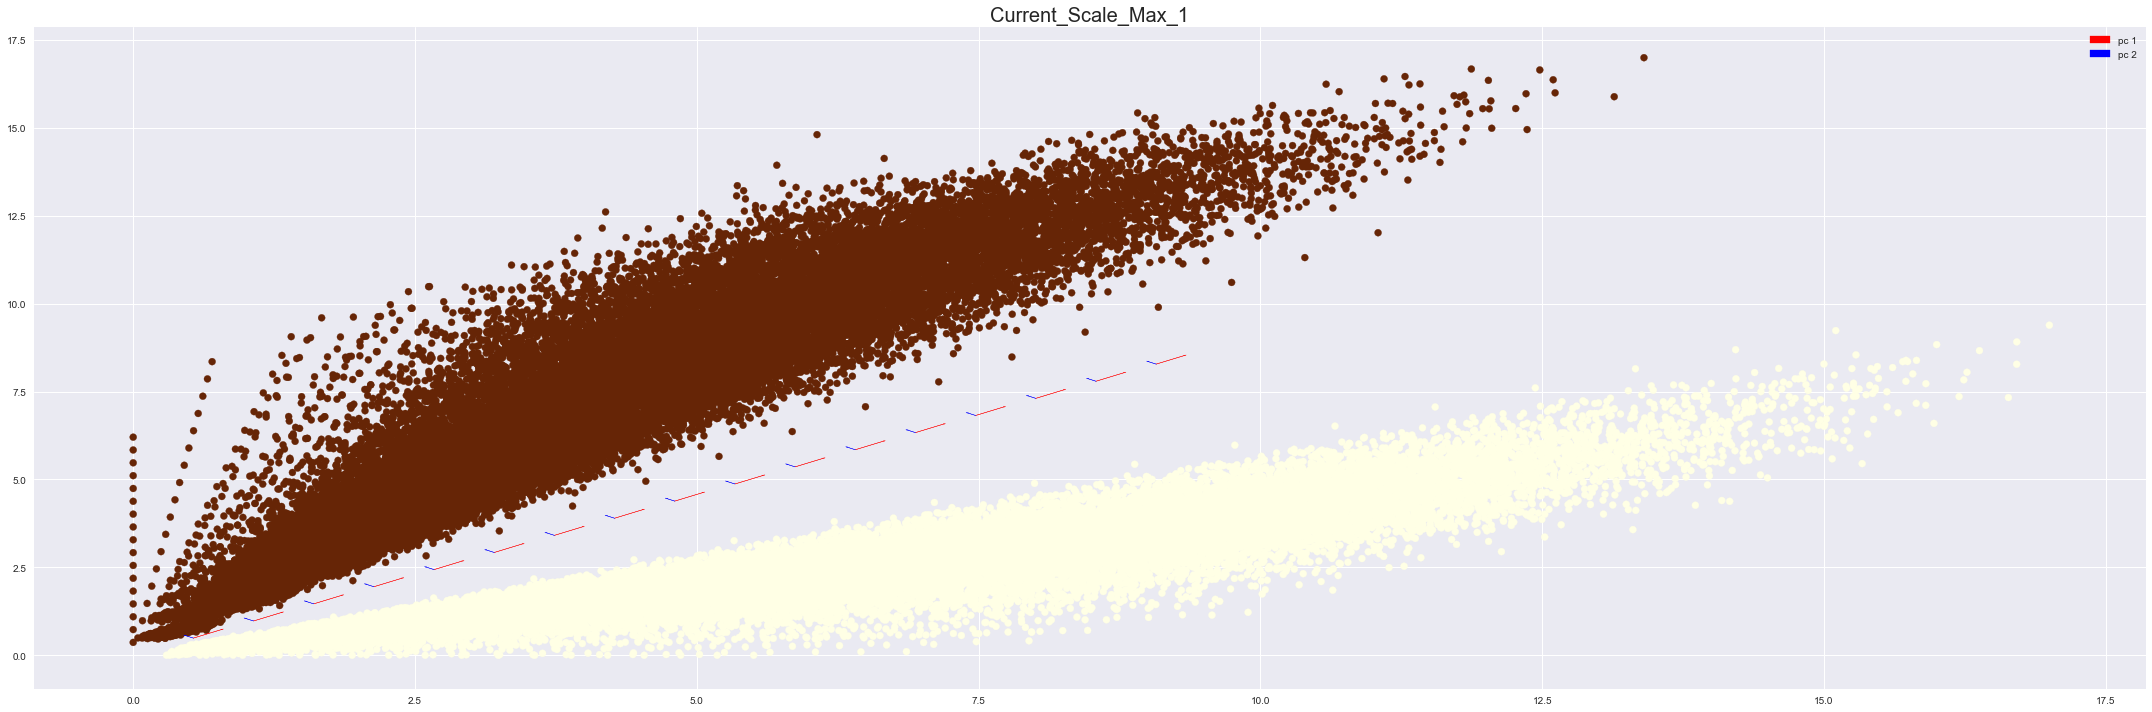

In [219]:
# create all of the plots for showing (close false)
for max_range in range(int(data.max()),0,-1):
    current_norm_data = normalize_with_range(data,mmax=max_range)
    current_U,current_S,current_V,current_ss = tf_pca_svd(current_norm_data,mmax=0.35,mmin=0.1)
    title     = 'Current_Scale_Max_' + str(max_range)
    cenx,ceny = current_norm_data.mean(0)
    plot_data_with_pca(current_norm_data,current_V,current_ss,cenx=cenx,ceny=ceny,width=0.005,title=title,show_fig=False,save_fig=True,close=False)

In [223]:
# create all of the plots for showing (close true)
for max_range in range(int(data.max()),0,-1):
    current_norm_data = normalize_with_range(data,mmax=max_range)
    current_U,current_S,current_V,current_ss = tf_pca_svd(current_norm_data,mmax=0.35,mmin=0.1)
    title     = 'Current_Scale_Max_' + str(max_range)
    cenx,ceny = current_norm_data.mean(0)
    plot_data_with_pca(current_norm_data,current_V,current_ss,cenx=cenx,ceny=ceny,width=0.005,title=title,show_fig=False,save_fig=True,close=True)

In [225]:
! start .

# Reference 
1. PCA?, R. (2018). Relationship between SVD and PCA. How to use SVD to perform PCA?. Cross Validated. Retrieved 15 November 2018, from https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
2. tf.linalg.svd | TensorFlow. (2018). TensorFlow. Retrieved 15 November 2018, from https://www.tensorflow.org/api_docs/python/tf/linalg/svd
3. Line and Scatter Plots. (2018). Plot.ly. Retrieved 15 November 2018, from https://plot.ly/matplotlib/line-and-scatter/
4. exception)?, H. (2018). How to check if a Tensorflow Session is still open (without catching an exception)?. Stack Overflow. Retrieved 15 November 2018, from https://stackoverflow.com/questions/42974627/how-to-check-if-a-tensorflow-session-is-still-open-without-catching-an-exceptio
5. sklearn.datasets.make_blobs — scikit-learn 0.20.0 documentation. (2018). Scikit-learn.org. Retrieved 15 November 2018, from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
6. Styling Markers. (2018). Plot.ly. Retrieved 15 November 2018, from https://plot.ly/python/marker-style/
7. Subplots. (2018). Plot.ly. Retrieved 15 November 2018, from https://plot.ly/python/subplots/
8. matplotlib, S. (2018). Seaborn configuration hides default matplotlib. Stack Overflow. Retrieved 15 November 2018, from https://stackoverflow.com/questions/33099348/seaborn-configuration-hides-default-matplotlib
9. color example code: colormaps_reference.py — Matplotlib 2.0.2 documentation. (2018). Matplotlib.org. Retrieved 15 November 2018, from https://matplotlib.org/examples/color/colormaps_reference.html
10. matplotlib.pyplot.arrow — Matplotlib 3.0.2 documentation. (2018). Matplotlib.org. Retrieved 15 November 2018, from https://matplotlib.org/api/_as_gen/matplotlib.pyplot.arrow.html
11. notebook?, H. (2018). How to set the matplotlib figure default size in ipython notebook?. Stack Overflow. Retrieved 15 November 2018, from https://stackoverflow.com/questions/17230797/how-to-set-the-matplotlib-figure-default-size-in-ipython-notebook
12. arrow, M. (2018). Matplotlib legend for an arrow. Stack Overflow. Retrieved 15 November 2018, from https://stackoverflow.com/questions/22348229/matplotlib-legend-for-an-arrow